In [1]:
#setup, grabbing all relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Euclidean distance function
def euc( xy1, xy2 ):
    "Returns the Euclidean distance between points xy1 and xy2"
    return ( ( ( xy1[0] - xy2[0] )**2 + ( xy1[1] - xy2[1] )**2 )**0.5 )

#kmeans = KMeans(init='random', n_clusters=2, max_iter=10, n_init=10).fit(X)

In [2]:
#Q2 pt 1
X_arrlist = [(0, 0), (0, 0.5), (1, 0.5), (1,1), (4, 0), (4, 1), (5, 1)]
cent1 = (0,0)
cent2 = (1,1)
max_iterations = 10

init1 = (0,0)
init2 = (1,1)
cluster1 = []
cluster2 = []
counter = []
X_atts = []

nn1 = 0
nn2 = 0
i = 0
while i < max_iterations:
    cluster1 = []
    cluster2 = []
    X_atts = []

    for point in X_arrlist:
        d1 = euc( point, cent1 )
        d2 = euc( point, cent2 )
        if d1 < d2:
            cluster1.append( point )
            X_atts.append( ( point, 'Group 1', 'Distance_to_1=' + str( round( d1, 2 ) ) , 'Distance_to_2=' + str( round( d2, 2 ) ) ) )
        else: 
            cluster2.append( point )
            X_atts.append( ( point, 'Group 2', 'Distance_to_1=' + str( round( d1, 2 ) ) , 'Distance_to_2=' + str( round( d2, 2 ) ) ) )
        
    print( "On iteration %s: \n Group 1 contains %s around Centroid 1 %s \n Group 2 contains %s around Centroid 2 %s \n distance and groups %s" % ( i, cluster1, cent1, cluster2, cent2, X_atts ) )
    
    #update centroids
    if not cluster1:
        cluster1.append(cent1)
    if not cluster2:
        cluster2.append(cent2)    
    n1 = [ round( sum(row[j] for row in cluster1)/ len( cluster1 ), 4 ) for j in range(len(cluster1[0])) ] 
    n2 = [ round( sum(row[j] for row in cluster2)/ len( cluster2 ), 4 ) for j in range(len(cluster2[0])) ] 
    cent1 = ( n1[0], n1[1] )
    cent2 = ( n2[0], n2[1] )
    if i > 0:
        if n1 == nn1 and n2 == nn2:
            print( 'Centroids converged after %s iterations at %s and %s' % (i, cent1, cent2 ) )
            break
            
    nn1 = n1
    nn2 = n2
    i += 1

On iteration 0: 
 Group 1 contains [(0, 0), (0, 0.5)] around Centroid 1 (0, 0) 
 Group 2 contains [(1, 0.5), (1, 1), (4, 0), (4, 1), (5, 1)] around Centroid 2 (1, 1) 
 distance and groups [((0, 0), 'Group 1', 'Distance_to_1=0.0', 'Distance_to_2=1.41'), ((0, 0.5), 'Group 1', 'Distance_to_1=0.5', 'Distance_to_2=1.12'), ((1, 0.5), 'Group 2', 'Distance_to_1=1.12', 'Distance_to_2=0.5'), ((1, 1), 'Group 2', 'Distance_to_1=1.41', 'Distance_to_2=0.0'), ((4, 0), 'Group 2', 'Distance_to_1=4.0', 'Distance_to_2=3.16'), ((4, 1), 'Group 2', 'Distance_to_1=4.12', 'Distance_to_2=3.0'), ((5, 1), 'Group 2', 'Distance_to_1=5.1', 'Distance_to_2=4.0')]
On iteration 1: 
 Group 1 contains [(0, 0), (0, 0.5), (1, 0.5), (1, 1)] around Centroid 1 (0.0, 0.25) 
 Group 2 contains [(4, 0), (4, 1), (5, 1)] around Centroid 2 (3.0, 0.7) 
 distance and groups [((0, 0), 'Group 1', 'Distance_to_1=0.25', 'Distance_to_2=3.08'), ((0, 0.5), 'Group 1', 'Distance_to_1=0.25', 'Distance_to_2=3.01'), ((1, 0.5), 'Group 1', 'Distanc

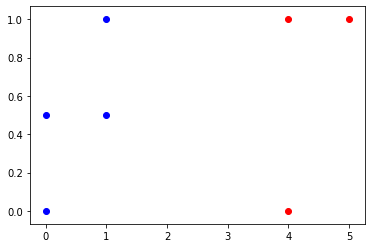

In [3]:
c1x = [ i[0] for i in cluster1 ]
c1y = [ i[1] for i in cluster1 ]

c2x = [ i[0] for i in cluster2 ]
c2y = [ i[1] for i in cluster2 ]

plt.scatter(c1x, c1y, color = "blue")
plt.scatter(c2x, c2y, color = "red")


In [4]:
#Q2 pt 2
X = np.array([[0, 0], [0, 0.5], [1, 0.5],[4, 0], [4, 1], [5, 1]])
X_arrlist = [(0, 0), (0, 0.5), (1, 0.5),(4, 0), (1,1), (4, 1), (5, 1)]
cent1 = (1,1.5)
cent2 = (-0.5,0)
cent3 =  (0.5,0.5)
cent4 = (5.5,0.5)
iterations = 10


#init1 = (0,0)
#init2 = (1,1)
#init3 = (9,9)
#init4 = (-9,-9)
distances_1 = {}
distances_2 = {}
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
counter = []
X_atts = []

nn1 = 0
nn2 = 0
nn3 = 0
nn4 = 0
i = 0
while i < iterations:
    cluster1 = []
    cluster2 = []
    cluster3 = []
    cluster4 = []
    X_atts = []
    
    for point in X_arrlist:
        d1 = euc( point, cent1 )
        d2 = euc( point, cent2 )
        d3 = euc( point, cent3 )
        d4 = euc( point, cent4 )
        if min( d1, d2, d3, d4 ) == d1:
            cluster1.append( point )
            X_atts.append( (point,'G1','D1='+str(round(d1,2)),'D2='+str(round(d2,2)),'D3='+str(round(d3,2)),'D4='+str(round(d2,2))))
        elif min( d1, d2, d3, d4 ) == d2:
            cluster2.append( point )
            X_atts.append( (point,'G2','D1='+str(round(d1,2)),'D2='+str(round(d2,2)),'D3='+str(round(d3,2)),'D4='+str(round(d2,2))))
        elif min( d1, d2, d3, d4 ) == d3:
            cluster3.append( point )
            X_atts.append( (point,'G3','D1='+str(round(d1,2)),'D2='+str(round(d2,2)),'D3='+str(round(d3,2)),'D4='+str(round(d2,2))))
        elif min( d1, d2, d3, d4 ) == d4:
            cluster4.append( point )
            X_atts.append( (point,'G4','D1='+str(round(d1,2)),'D2='+str(round(d2,2)),'D3='+str(round(d3,2)),'D4='+str(round(d2,2))))
            
        
    print("On iteration %s: \n G1: %s ard %s \n G2: %s ard %s \n G3: %s ard %s \n G4: %s ard %s \n Distances: %s" % (i,cluster1,cent1,cluster2,cent2,cluster3,cent3,cluster4,cent4,X_atts))
    
    #update centroids
    if not cluster1:
        cluster1.append(cent1)
    if not cluster2:
        cluster2.append(cent2) 
    if not cluster3:
        cluster3.append(cent3)
    if not cluster4:
        cluster4.append(cent4)           
    n1 = [ round( sum(row[j] for row in cluster1)/ len( cluster1 ), 4 ) for j in range(len(cluster1[0])) ] 
    n2 = [ round( sum(row[j] for row in cluster2)/ len( cluster2 ), 4 ) for j in range(len(cluster2[0])) ] 
    n3 = [ round( sum(row[j] for row in cluster3)/ len( cluster3 ), 4 ) for j in range(len(cluster3[0])) ]     
    n4 = [ round( sum(row[j] for row in cluster4)/ len( cluster4 ), 4 ) for j in range(len(cluster4[0])) ]     
    cent1 = ( n1[0], n1[1] )
    cent2 = ( n2[0], n2[1] )
    cent3 = ( n3[0], n3[1] )
    cent4 = ( n4[0], n4[1] )    
    if i > 0:
        if n1 == nn1 and n2 == nn2 and n3 == nn3 and n4 == nn4:
            print('converged after %s iterations at %s, %s, %s, %s' % (i, cent1, cent2, cent3, cent4 ))
            break
            
    
    nn1 = n1
    nn2 = n2
    nn3 = n3
    nn4 = n4
    
    i += 1
        
    #next i
    

On iteration 0: 
 G1: [(1, 1)] ard (1, 1.5) 
 G2: [(0, 0)] ard (-0.5, 0) 
 G3: [(0, 0.5), (1, 0.5)] ard (0.5, 0.5) 
 G4: [(4, 0), (4, 1), (5, 1)] ard (5.5, 0.5) 
 Distances: [((0, 0), 'G2', 'D1=1.8', 'D2=0.5', 'D3=0.71', 'D4=0.5'), ((0, 0.5), 'G3', 'D1=1.41', 'D2=0.71', 'D3=0.5', 'D4=0.71'), ((1, 0.5), 'G3', 'D1=1.0', 'D2=1.58', 'D3=0.5', 'D4=1.58'), ((4, 0), 'G4', 'D1=3.35', 'D2=4.5', 'D3=3.54', 'D4=4.5'), ((1, 1), 'G1', 'D1=0.5', 'D2=1.8', 'D3=0.71', 'D4=1.8'), ((4, 1), 'G4', 'D1=3.04', 'D2=4.61', 'D3=3.54', 'D4=4.61'), ((5, 1), 'G4', 'D1=4.03', 'D2=5.59', 'D3=4.53', 'D4=5.59')]
On iteration 1: 
 G1: [(1, 0.5), (1, 1)] ard (1.0, 1.0) 
 G2: [(0, 0), (0, 0.5)] ard (0.0, 0.0) 
 G3: [] ard (0.5, 0.5) 
 G4: [(4, 0), (4, 1), (5, 1)] ard (4.3333, 0.6667) 
 Distances: [((0, 0), 'G2', 'D1=1.41', 'D2=0.0', 'D3=0.71', 'D4=0.0'), ((0, 0.5), 'G2', 'D1=1.12', 'D2=0.5', 'D3=0.5', 'D4=0.5'), ((1, 0.5), 'G1', 'D1=0.5', 'D2=1.12', 'D3=0.5', 'D4=1.12'), ((4, 0), 'G4', 'D1=3.16', 'D2=4.0', 'D3=3.54', 'D

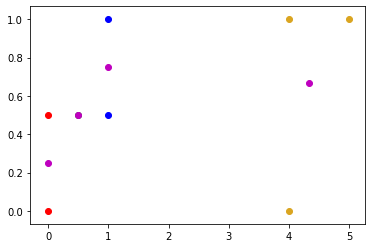

In [5]:
c1x = [ i[0] for i in cluster1 ]
c1y = [ i[1] for i in cluster1 ]
c2x = [ i[0] for i in cluster2 ]
c2y = [ i[1] for i in cluster2 ]
c3x = [ i[0] for i in cluster3 ]
c3y = [ i[1] for i in cluster3 ]
c4x = [ i[0] for i in cluster4 ]
c4y = [ i[1] for i in cluster4 ]
cent = [ cent1, cent2, cent3, cent4 ]
cx = [ i[0] for i in cent ]
cy = [ i[1] for i in cent ]

plt.scatter(c1x, c1y, color = "b")
plt.scatter(c2x, c2y, color = "r")
plt.scatter(c3x, c3y, color = "forestgreen")
plt.scatter(c4x, c4y, color = "goldenrod")
plt.scatter(cx, cy, color = 'm')

In [6]:
#Q2 pt 2-2
X_arrlist = [1, 2, 3, 7, 8, 9]
cent1 = 0
cent2 = 10
cent3 = 5
iterations = 10
cluster1 = []
cluster2 = []
cluster3 = []
X_atts = []

nn1 = 0
nn2 = 0
nn3 = 0
i = 0
while i < iterations:
    cluster1 = []
    cluster2 = []
    cluster3 = []
    X_atts = []
    for point in X_arrlist:
        d1 = abs( point - cent1 )
        d2 = abs( point - cent2 )
        d3 = abs( point - cent3 )
        if min( d1, d2, d3 ) == d1:
            cluster1.append( point )
            X_atts.append( (point,'G1','D1='+str(round(d1,2)),'D2='+str(round(d2,2)), 'D3='+str(round(d3,2))) )
        elif min( d1, d2, d3 ) == d2:
            cluster2.append( point )
            X_atts.append( (point,'G2','D1='+str(round(d1,2)),'D2='+str(round(d2,2)), 'D3='+str(round(d3,2))) )      
        else:
            cluster3.append( point )
            X_atts.append( (point,'G3','D1='+str(round(d1,2)),'D2='+str(round(d2,2)), 'D3='+str(round(d3,2))) )

    print( "On iteration %s: \n G1 contains %s ard C1 %s \n G2 contains %s ard C2 %s \n G3 contains %s ard C3 %s \n Distance and groups %s" % ( i, cluster1, cent1, cluster2, cent2, cluster3, cent3, X_atts ) )
    
    #update centroids
    if not cluster1:
        cluster1.append(cent1)
    if not cluster2:
        cluster2.append(cent2) 
    if not cluster3:
        cluster3.append(cent3)         
    n1 = round( sum( cluster1 )/len( cluster1 ), 4)
    n2 = round( sum( cluster2 )/len( cluster2 ), 4)
    n3 = round( sum( cluster3 )/len( cluster3 ), 4)    
  
    cent1 = ( n1 )
    cent2 = ( n2 )   
    cent3 = ( n3 )     
    if i > 0:
        if n1 == nn1 and n2 == nn2 and n3 == nn3:
            print('converged after %s iterations at %s, %s, %s' % (i, cent1, cent2, cent3 ))
            break
        
    nn1 = n1
    nn2 = n2
    nn3 = n3
    
    i += 1
        
    #next i
    

On iteration 0: 
 G1 contains [1, 2] ard C1 0 
 G2 contains [8, 9] ard C2 10 
 G3 contains [3, 7] ard C3 5 
 Distance and groups [(1, 'G1', 'D1=1', 'D2=9', 'D3=4'), (2, 'G1', 'D1=2', 'D2=8', 'D3=3'), (3, 'G3', 'D1=3', 'D2=7', 'D3=2'), (7, 'G3', 'D1=7', 'D2=3', 'D3=2'), (8, 'G2', 'D1=8', 'D2=2', 'D3=3'), (9, 'G2', 'D1=9', 'D2=1', 'D3=4')]
On iteration 1: 
 G1 contains [1, 2, 3] ard C1 1.5 
 G2 contains [7, 8, 9] ard C2 8.5 
 G3 contains [] ard C3 5.0 
 Distance and groups [(1, 'G1', 'D1=0.5', 'D2=7.5', 'D3=4.0'), (2, 'G1', 'D1=0.5', 'D2=6.5', 'D3=3.0'), (3, 'G1', 'D1=1.5', 'D2=5.5', 'D3=2.0'), (7, 'G2', 'D1=5.5', 'D2=1.5', 'D3=2.0'), (8, 'G2', 'D1=6.5', 'D2=0.5', 'D3=3.0'), (9, 'G2', 'D1=7.5', 'D2=0.5', 'D3=4.0')]
On iteration 2: 
 G1 contains [1, 2, 3] ard C1 2.0 
 G2 contains [7, 8, 9] ard C2 8.0 
 G3 contains [] ard C3 5.0 
 Distance and groups [(1, 'G1', 'D1=1.0', 'D2=7.0', 'D3=4.0'), (2, 'G1', 'D1=0.0', 'D2=6.0', 'D3=3.0'), (3, 'G1', 'D1=1.0', 'D2=5.0', 'D3=2.0'), (7, 'G2', 'D1=5.0